## Part 1
### Plan
- find the trees that are not visible
  - as you iterate track the max height from all directions


In [35]:
with open('input.txt') as f:
    lines = f.readlines()
lines = [line.replace('\n', '') for line in lines]

class Monkey:
    # # example full_str
    # Monkey 3:
    #     Starting items: 74
    #     Operation: new = old + 3
    #     Test: divisible by 17
    #         If true: throw to monkey 0
    #         If false: throw to monkey 1
    def __init__(self, monkeys_lines):
        # parse string
        
        self.starting_items = [int(x) for x in monkeys_lines[1].split(':')[1].split(',')]
        self.operation = monkeys_lines[2].split("=")[1].strip().split(' ')
        self.condition = monkeys_lines[3].split(": ")[1].strip().split(" by ")
        self.true_target = int(monkeys_lines[4].split(": ")[1].split(' ')[-1])
        self.false_target = int(monkeys_lines[5].split(": ")[1].split(' ')[-1])
        self.inspections = 0
    
    def throw_item(self):
        def operator(op_str, a, b):
            if op_str == '+':
                return a + b
            elif op_str == '*':
                return a * b
            else:
                raise ValueError('Invalid operator')
        item = self.starting_items.pop(0)
        self.inspections += 1
        operator_a = item if self.operation[0] == 'old' else int(self.operation[0])
        operator_b = item if self.operation[2] == 'old' else int(self.operation[2])
        new_item = operator(self.operation[1], operator_a, operator_b)
        new_item = new_item // 3
        if self.condition[0] == 'divisible':
            condition_satisfied = (new_item % int(self.condition[1])) == 0
        target = self.true_target if condition_satisfied else self.false_target
        return [target, new_item]
    def throw_all_items(self):
        throws = []
        while len(self.starting_items) > 0:
            throws.append(self.throw_item())
        return throws
    def add_item(self, item):
        self.starting_items.append(item)
    
    

        
def create_monkeys(lines):
    monkeys = []
    monkey_lines = [lines[i*7:i*7+7] for i in range(round (len(lines) / 7))]
    for monkey_lines in monkey_lines:
        monkeys.append(Monkey(monkey_lines))
    return monkeys
monkeys = create_monkeys(lines)
def gauntlet(rounds):
    for i in range(rounds):
        for monkey in monkeys:
            thrown = monkey.throw_all_items()
            for item in thrown:
                monkeys[item[0]].add_item(item[1])
    
    return monkeys

monkeys = gauntlet(20)
monkeys_inspections = []
for monkey in monkeys:
    monkeys_inspections.append(monkey.inspections)
    print(monkey.inspections)
# get the two hightst monkeys_inspections
monkeys_inspections.sort(reverse=True)
monkey_business = monkeys_inspections[0] * monkeys_inspections[1]
print(monkey_business)


    


KeyboardInterrupt: 

## Part 2

In [43]:
with open('input.txt') as f:
    lines = f.readlines()
lines = [line.replace('\n', '') for line in lines]

class Monkey:
    # # example full_str
    # Monkey 3:
    #     Starting items: 74
    #     Operation: new = old + 3
    #     Test: divisible by 17
    #         If true: throw to monkey 0
    #         If false: throw to monkey 1
    def __init__(self, monkeys_lines):
        # parse string
        self.id = int(monkeys_lines[0].split(' ')[1].split(':')[0])        
        self.starting_items = [int(x) for x in monkeys_lines[1].split(':')[1].split(',')]
        self.operation = monkeys_lines[2].split("=")[1].strip().split(' ')
        self.condition = monkeys_lines[3].split(": ")[1].strip().split(" by ")
        self.true_target = int(monkeys_lines[4].split(": ")[1].split(' ')[-1])
        self.false_target = int(monkeys_lines[5].split(": ")[1].split(' ')[-1])
        self.inspections = 0
        self.modulo = None
    
    def throw_item(self):
        def operator(op_str, a, b):
            if op_str == '+':
                return a + b
            elif op_str == '*':
                return a * b
            else:
                raise ValueError('Invalid operator')
        item = self.starting_items.pop(0)
        self.inspections += 1
        operator_a = item if self.operation[0] == 'old' else int(self.operation[0])
        operator_b = item if self.operation[2] == 'old' else int(self.operation[2])
        new_item = operator(self.operation[1], operator_a, operator_b)
        new_item = new_item % self.modulo
        if self.condition[0] == 'divisible':
            condition_satisfied = (new_item % int(self.condition[1])) == 0
        target = self.true_target if condition_satisfied else self.false_target
        return [target, new_item, self.id]
    def throw_all_items(self):
        throws = []
        while len(self.starting_items) > 0:
            throws.append(self.throw_item())
        return throws
    def add_item(self, item):
        self.starting_items.append(item)
    
    

        
def create_monkeys(lines):
    monkeys = []
    monkey_lines = [lines[i*7:i*7+7] for i in range(round (len(lines) / 7))]
    for monkey_lines in monkey_lines:
        monkeys.append(Monkey(monkey_lines))
    return monkeys

def gauntlet(rounds):
    throws_metrics = []
    for i in range(rounds):
        # if i % 100 == 0:
        #     print(i)
        for monkey in monkeys:
            thrown = monkey.throw_all_items()
            # throws_metrics.extend(thrown)
            for item in thrown:
                monkeys[item[0]].add_item(item[1])
    
    return [monkeys, throws_metrics]

monkeys = create_monkeys(lines)
def monkey_business_measure(monkeys):
    monkeys, throws_metrics = gauntlet(1)
    monkeys_inspections = []
    for idx, monkey in enumerate(monkeys):
        monkeys_inspections.append(monkey.inspections)
        # print(f"Monkey {idx}: ",monkey.inspections)
    # get the two hightst monkeys_inspections
    monkeys_inspections.sort(reverse=True)
    monkey_business = monkeys_inspections[0] * monkeys_inspections[1]
    return monkey_business


modulo = 1
for monkey in monkeys:
    modulo *= int(monkey.condition[1])
for monkey in monkeys:
    monkey.modulo = modulo

all_monkey_business = []
for i in range(10000):
    monkey_business = monkey_business_measure(monkeys)
    # print(monkey_business)
    all_monkey_business.append(monkey_business)
    # print('----------------')

print(all_monkey_business[-1])


    


30616425600


In [36]:
with open("input.txt", "r") as f:
    content = f.read().splitlines()

monkeyOperations = [(content[x][23:]) for x in range(2, len(content), 7)]
monkeyTest = [int(content[x][21:]) for x in range(3, len(content), 7)]
print(monkeyTest)
monkeyConditions = [[int(content[x][29:]), int(content[x+1][30:])] for x in range(4, len(content), 7)]

modulo = 1
for i in monkeyTest:
    modulo *= i

def main(part):
    monkeyInspections = [0 for _ in range(len(monkeyTest))]
    monkeyItems = [[[int(x) for x in (content[y][18:]).split(", ")] for y in range(1, len(content), 7)]][0]
    for _ in range(0, (20 if part == 1 else 10000 if part == 2 else 0)):
        for i in range(0, len(monkeyInspections)):
            for j in range(0, len(monkeyItems[i])):
                current = monkeyItems[i][j]
                if monkeyOperations[i] == "* old":
                    current *= current
                elif monkeyOperations[i][:2] == "* ":
                    current *= int(monkeyOperations[i][2:])
                elif monkeyOperations[i][:2] == "+ ":
                    current += int(monkeyOperations[i][2:])
                current = current // 3 if part == 1 else current % modulo
                if current % monkeyTest[i] == 0:
                    monkeyItems[monkeyConditions[i][0]].append(current)
                else:
                    monkeyItems[monkeyConditions[i][1]].append(current)
                monkeyInspections[i] += 1
            monkeyItems[i] = []
    return sorted(monkeyInspections)[-1]*sorted(monkeyInspections)[-2]

print("Part 1:", main(1))
print("Part 2:", main(2))

[13, 11, 2, 5, 7, 3, 19, 17]
Part 1: 117640
Part 2: 30616425600


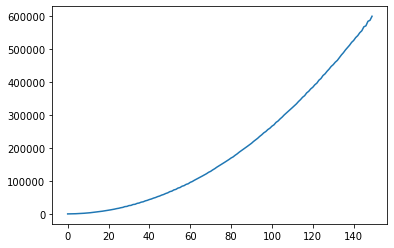

coefficient of determination: 0.9340616209359194
intercept: [-98751.58472406]
slope: [[3991.95746833]]


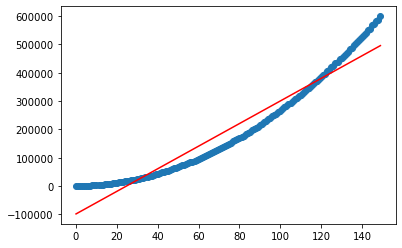

In [29]:
# 1059870 at 200
# create a line graph that show monkey_business over iteration
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(all_monkey_business)
plt.show()
# use the data from all_monkey_business which contains 150 iterations of monkey_business
# use that to predict the 200th iteration
import numpy as np
from sklearn.linear_model import LinearRegression
x = np.array(range(150)).reshape(-1, 1)
y = np.array(all_monkey_business).reshape(-1, 1)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [28]:
extrapolatedtrendline

[-98751.58472406182,
 -94759.6272557299,
 -90767.66978739796,
 -86775.71231906603,
 -82783.75485073411,
 -78791.79738240219,
 -74799.83991407027,
 -70807.88244573833,
 -66815.92497740641,
 -62823.967509074486,
 -58832.010040742556,
 -54840.05257241063,
 -50848.095104078704,
 -46856.13763574678,
 -42864.18016741485,
 -38872.22269908292,
 -34880.265230751,
 -30888.307762419077,
 -26896.350294087155,
 -22904.392825755218,
 -18912.435357423295,
 -14920.477889091373,
 -10928.520420759436,
 -6936.562952427514,
 -2944.6054840955912,
 1047.3519842363312,
 5039.309452568254,
 9031.26692090019,
 13023.224389232113,
 17015.181857564035,
 21007.139325895972,
 24999.096794227895,
 28991.054262559817,
 32983.011730891754,
 36974.96919922366,
 40966.9266675556,
 44958.88413588751,
 48950.841604219444,
 52942.79907255138,
 56934.75654088329,
 60926.714009215226,
 64918.67147754716,
 68910.62894587907,
 72902.58641421101,
 76894.54388254294,
 80886.50135087485,
 84878.45881920679,
 88870.4162875387,
 9